# Preliminary operations

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/Homework1

/gdrive/MyDrive/Homework1


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

2.9.2


# Dataset folder unzip

In [ ]:
!unzip training_dataset_homework1.zip 

Archive:  training_dataset_homework1.zip
   creating: training_data_final/Species1/
  inflating: training_data_final/Species1/00000.jpg  
  inflating: training_data_final/Species1/00001.jpg  
  inflating: training_data_final/Species1/00002.jpg  
  inflating: training_data_final/Species1/00003.jpg  
  inflating: training_data_final/Species1/00004.jpg  
  inflating: training_data_final/Species1/00005.jpg  
  inflating: training_data_final/Species1/00006.jpg  
  inflating: training_data_final/Species1/00007.jpg  
  inflating: training_data_final/Species1/00008.jpg  
  inflating: training_data_final/Species1/00009.jpg  
  inflating: training_data_final/Species1/00010.jpg  
  inflating: training_data_final/Species1/00011.jpg  
  inflating: training_data_final/Species1/00012.jpg  
  inflating: training_data_final/Species1/00013.jpg  
  inflating: training_data_final/Species1/00014.jpg  
  inflating: training_data_final/Species1/00015.jpg  
  inflating: training_data_final/Species1/00016.jpg 

In [ ]:
!ls 

'Part1 - Dataset.ipynb'		    training_data_final
'Part2 - Nets from scratch.ipynb'   training_dataset_homework1.zip


# Inspect the original dataset

In [ ]:
dataset_gen = ImageDataGenerator().flow_from_directory(directory="training_data_final",
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=seed)

Found 3542 images belonging to 8 classes.


In [ ]:
labels = {
    0:'Species1', 
    1:'Species2', 
    2:'Species3', 
    3:'Species4', 
    4:'Species5', 
    5:'Species6',
    6:'Species7', 
    7:'Species8'}

In [ ]:
batch = next(dataset_gen)
print("Batch shape:", batch[0].shape)
print("(Input) image shape:", batch[0][1].shape)
print("Target shape:", batch[1][1].shape)

Batch shape: (32, 96, 96, 3)
(Input) image shape: (96, 96, 3)
Target shape: (8,)


In [ ]:
def visualize_batch(batch):

  images = batch[0]
  targets = batch[1]

  size, scale = 1000, 10
  r = 4
  c= 3
  fig , axs = plt.subplots(r,c, figsize=(25,20))
  axsf=axs.flat

  for i in range(len(axsf)):
      image = images[i]
      target = targets[i]
      target_idx = np.argmax(target)

      axsf[i].imshow(np.uint8(image))
      axsf[i].set_title(labels[target_idx])

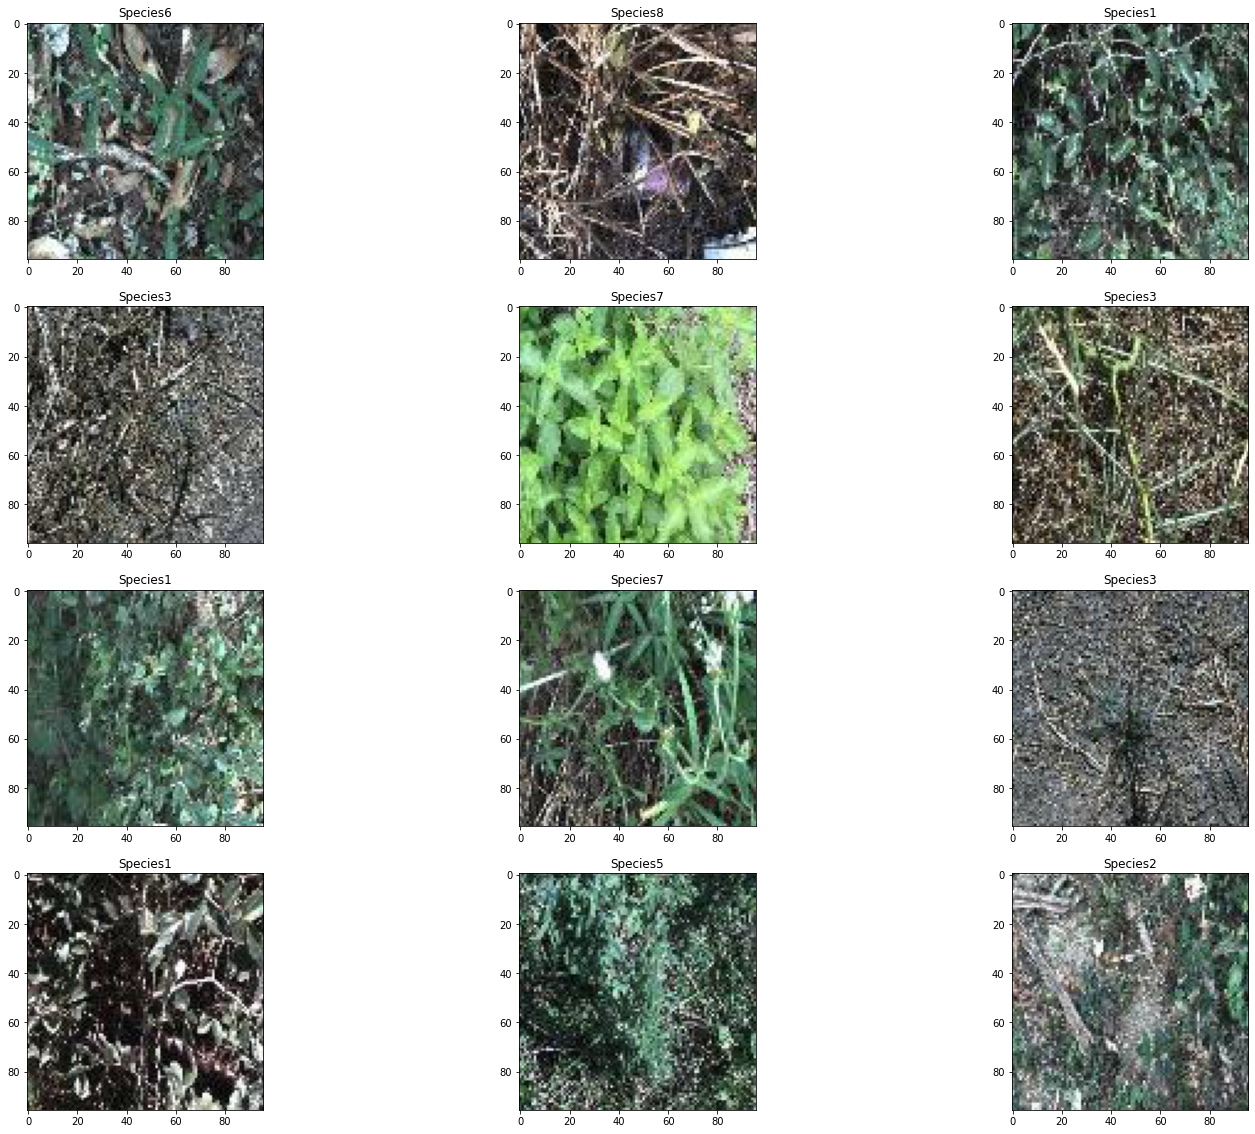

In [ ]:
# Get a sample from dataset and show info
visualize_batch(batch)

In [ ]:
dataset_gen = ImageDataGenerator().flow_from_directory(directory="training_data_final",
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=128,
                                               shuffle=True,
                                               seed=seed)

Found 3542 images belonging to 8 classes.


In [ ]:
means = {}
means["Species1"] = []
means["Species2"] = []
means["Species3"] = []
means["Species4"] = []
means["Species5"] = []
means["Species6"] = []
means["Species7"] = []
means["Species8"] = []

std = {}
std["Species1"] = []
std["Species2"] = []
std["Species3"] = []
std["Species4"] = []
std["Species5"] = []
std["Species6"] = []
std["Species7"] = []
std["Species8"] = []

batch = next(dataset_gen)
images = batch[0]
targets = batch[1]

for i in range(len(images)):
  image = images[i]
  target = targets[i]
  target = labels[np.argmax(target)]
  
  # Obtain the mean of all channels of the RGB space of the image
  means[target].append(np.mean(images[i]))
  std[target].append(np.std(images[i]))

for m in means:
  means[m] = np.mean(means[m])
  std[m] = np.mean(std[m])

In [ ]:
print(means)
print(std)

{'Species1': 85.534744, 'Species2': 95.21728, 'Species3': 90.3878, 'Species4': 91.21389, 'Species5': 82.28032, 'Species6': 98.93251, 'Species7': 108.50441, 'Species8': 80.276024}
{'Species1': 63.645573, 'Species2': 50.15519, 'Species3': 51.52605, 'Species4': 48.923447, 'Species5': 55.596233, 'Species6': 50.00293, 'Species7': 46.523796, 'Species8': 59.253513}


# Split folders 

We used Splitfolders to generate train, test and validation folders from the original folder 

In [ ]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dataset_dir_orig = "training_data_final"
dataset_dir_split = "dataset_homework1"

In [ ]:
splitfolders.ratio(dataset_dir_orig, output=dataset_dir_split,
    seed=seed, ratio=(.8, .1, .1), group_prefix=None, move=False) #ratio of division

Copying files: 3542 files [01:17, 45.48 files/s]


In [ ]:
!ls dataset_homework1

test  train  val


In [ ]:
training_dir = os.path.join(dataset_dir_split, 'train') 
validation_dir = os.path.join(dataset_dir_split, 'val') 
test_dir = os.path.join(dataset_dir_split, 'test') 

# Augmentation

### Define Augmentation

Here we tried several combination of the available transformation, taking into account which properties might or might not affect the labels:
- zero mean/norm (included, feature-wise)
- rotation (no effect on any label, included)
- zoom and shift (no effect on any label, included but with small values to not lose relevent portions of the image)
- flips (horizontal and vertical) (excluded, they provided lower performances, we expect that this is because they provide an unrealistic transformation that might modify the classification label)
- brightness_range (included but with small values to stay in realistic illumination condition)

We decided to fill the points outside the boundaries with the reflect approach to stick the closest possible to the realistic scenario. 

In [ ]:
aug_generator = ImageDataGenerator(featurewise_center=True,
                                    samplewise_center=False,
                                    featurewise_std_normalization=True,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=180,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    brightness_range=[0.6,1.4],
                                    fill_mode='reflect',
                                    horizontal_flip=False,
                                    vertical_flip=False,
                                    rescale=None,
                                    preprocessing_function=None, #Included in the NN
                                   )


### Visualize augmentation

In [ ]:
aug_gen_flow = aug_generator.flow_from_directory(directory=training_dir,
                                                       target_size=(96,96),
                                                       color_mode='rgb',
                                                       classes=None,
                                                       class_mode='categorical',
                                                       batch_size=32,
                                                       shuffle=True,
                                                       seed=seed)

Found 2829 images belonging to 8 classes.


/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Transform: {'theta': 133.77518182376303, 'tx': -9.34294163289424, 'ty': 6.347216715957321, 'shear': 0, 'zx': 1.1201419516093627, 'zy': 1.065065805223742, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': 1.0396669253777149}


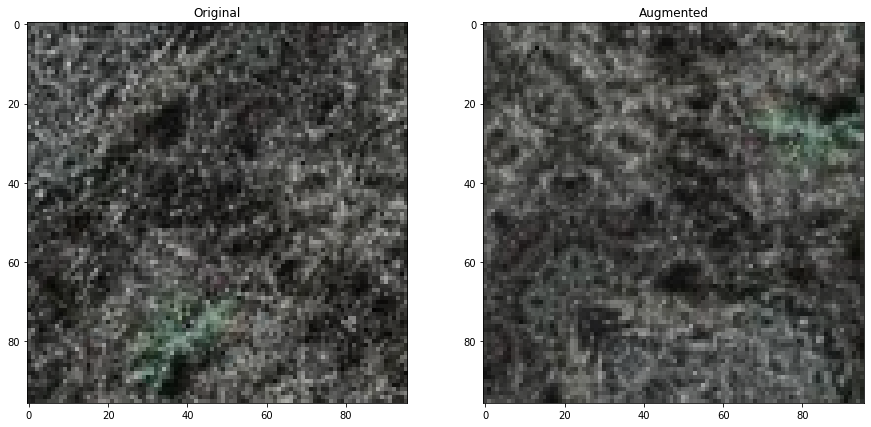

In [ ]:
image = next(aug_gen_flow)[0][1]

# Get random transformation
t = aug_generator.get_random_transform(img_shape=(96, 96))
print("Transform:", t)

# Apply the transformation 
augmented_img = aug_generator.apply_transform(image, t)

# Plot original and augmented images
fig, ax = plt.subplots(1, 2, figsize=(15,30))
ax[0].imshow(np.uint8(image))
ax[0].set_title("Original")
ax[1].imshow(np.uint8(augmented_img))
ax[1].set_title("Augmented")
plt.show()

### Data loaders with the defined augmentation

In [ ]:
# AUGMENTED TRAINING SET
aug_train_gen = aug_generator.flow_from_directory(directory=training_dir,
                                                       target_size=(96,96),
                                                       color_mode='rgb',
                                                       classes=None,
                                                       class_mode='categorical',
                                                       batch_size=64,
                                                       shuffle=True,
                                                       seed=seed)


# VALIDATION SET
valid_gen = ImageDataGenerator().flow_from_directory(directory=validation_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None,
                                               class_mode='categorical',
                                               batch_size=64,
                                               shuffle=False,
                                               seed=seed)

# TEST SET
test_gen = ImageDataGenerator().flow_from_directory(directory=test_dir,
                                              target_size=(96,96),
                                              color_mode='rgb',
                                              classes=None,
                                              class_mode='categorical',
                                              batch_size=64,
                                              shuffle=False,
                                              seed=seed)

Found 2829 images belonging to 8 classes.
Found 351 images belonging to 8 classes.
Found 362 images belonging to 8 classes.


In [ ]:
train_target = aug_train_gen.classes
val_target = valid_gen.classes
test_target = test_gen.classes

train_target_cat = tfk.utils.to_categorical(aug_train_gen.classes)
val_target_cat = tfk.utils.to_categorical(valid_gen.classes)
test_target_cat = tfk.utils.to_categorical(test_gen.classes)

# Inspect distribution

In [ ]:
unique, counts = np.unique(aug_train_gen.classes, return_counts=True)
print("Train: " + str(dict(zip(unique, counts))))
unique, counts = np.unique(valid_gen.classes, return_counts=True)
print("Validation: " + str(dict(zip(unique, counts))))
unique, counts = np.unique(test_gen.classes, return_counts=True)
print("Test: " + str(dict(zip(unique, counts))))

Train: {0: 148, 1: 425, 2: 412, 3: 408, 4: 424, 5: 177, 6: 429, 7: 406}
Validation: {0: 18, 1: 53, 2: 51, 3: 51, 4: 53, 5: 22, 6: 53, 7: 50}
Test: {0: 20, 1: 54, 2: 52, 3: 52, 4: 54, 5: 23, 6: 55, 7: 52}


In [ ]:
train_target_cat = tfk.utils.to_categorical(aug_train_gen.classes)
val_target_cat = tfk.utils.to_categorical(valid_gen.classes)
test_target_cat = tfk.utils.to_categorical(test_gen.classes)

In [ ]:
labels = ['S1', 'S2', 'S3','S4','S5','S6','S7','S8']

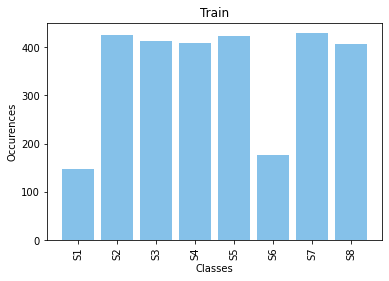

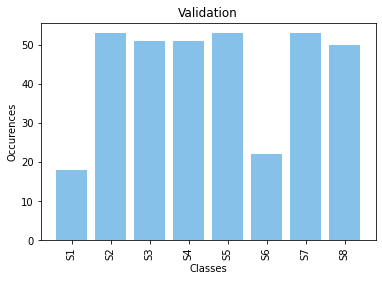

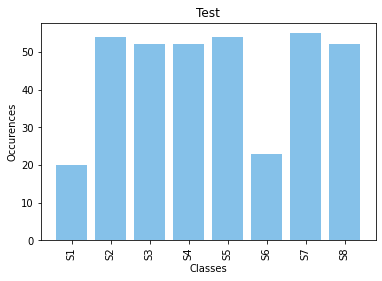

In [ ]:
plt.bar(x=labels,height=train_target_cat.sum(axis=0), facecolor ='#85c1e9')
plt.title("Train", color = "black")
plt.tick_params(axis="both", colors = "black")
plt.xlabel("Classes", color = "black")
plt.ylabel("Occurences", color = "black")
plt.xticks(rotation=90)
plt.yticks
plt.show()

plt.bar(x=labels,height=val_target_cat.sum(axis=0), facecolor ='#85c1e9')
plt.title("Validation", color = "black")
plt.tick_params(axis="both", colors = "black")
plt.xlabel("Classes", color = "black")
plt.ylabel("Occurences", color = "black")
plt.xticks(rotation=90)
plt.yticks
plt.show()

plt.bar(x=labels,height=test_target_cat.sum(axis=0), facecolor ='#85c1e9')
plt.title("Test", color = "black")
plt.tick_params(axis="both", colors = "black")
plt.xlabel("Classes", color = "black")
plt.ylabel("Occurences", color = "black")
plt.xticks(rotation=90)
plt.yticks
plt.show()

# Class balancing

In [ ]:
%pip install keras-cv --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394 kB 5.9 MB/s 


In [ ]:
from itertools import count
import keras_cv
from PIL import Image

In [ ]:
random_cutout = keras_cv.layers.preprocessing.RandomCutout(0.2, 0.2,'gaussian_noise')
random_gridmask = keras_cv.layers.preprocessing.GridMask()

In [ ]:
def tensor_to_image(tensor):

  """ Convert a tensor in an image"""

    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor) 

In [ ]:
def create_balanced_dataset(num, new_dir):

  """Function used to generate new folders with a number of images per class equal to the parameter num, the images are not just 
     replicated, they are augmented via a change in contrast and saturation, in addition we can add the cutout option """ 
  # num = number of wanted images for each class

  splitfolders.ratio('training_data_final', output=new_dir,
                      seed=seed, ratio=(.8, .1, .1), group_prefix=None, move=False) 
  
  path = new_dir + "/train"

  for k in range(1,9): 
    path_sp = os.path.join(path, "Species"+str(k))
    files = os.listdir(path_sp)
    n = len(files)
    repetitions = num - n
    
    print('############## Start Species ', k,' ##############')
    print('Original number of images: ', n)
    print('Number of images to add: ', repetitions)

    count, i = 0,0
    while count < repetitions:
      if i < n:
        img_name = os.path.join(path_sp, files[i])
        new_img_name = os.path.join(path_sp, "aug_"+str(count)+files[i])

        img = Image.open(img_name)
        aug_img = random_cutout(np.array(img))
        aug_img = tf.image.random_contrast(aug_img, 0.5, 1.5)
        aug_img = tf.image.random_saturation(aug_img, 0.75, 1.25)
        aug_img = tensor_to_image(aug_img)
        aug_img.save(new_img_name) 

        count = count + 1
        i = i + 1
      
      else: 
        i = 0 

In [ ]:
num = 1000
new_dir = "balanced_dataset_"+str(num)
create_balanced_dataset(num, new_dir)

Copying files: 3542 files [00:50, 70.47 files/s]


############## Start Species  1  ##############
Original number of images:  148
Number of images to add:  852
############## Start Species  2  ##############
Original number of images:  425
Number of images to add:  575
############## Start Species  3  ##############
Original number of images:  412
Number of images to add:  588
############## Start Species  4  ##############
Original number of images:  408
Number of images to add:  592
############## Start Species  5  ##############
Original number of images:  424
Number of images to add:  576
############## Start Species  6  ##############
Original number of images:  177
Number of images to add:  823
############## Start Species  7  ##############
Original number of images:  429
Number of images to add:  571
############## Start Species  8  ##############
Original number of images:  406
Number of images to add:  594


In [ ]:
dirs = {}
for k in range(1,9):
  path = new_dir+'/train/Species'+str(k)
  dirs[k] = len(os.listdir(path)) 

dirs #check how many images per class in the above created folder

{1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000}